In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import numpy as np

In [3]:
df = pd.read_csv('csv_files/cars_2025-06-15_19-38-05.csv', sep=";", parse_dates=['snapshot_dtm'])
# df = pd.read_csv('csv_files/cars_2025-06-13_01-28-20.csv', sep=";", parse_dates=['snapshot_dtm'])
# df1 = pd.read_csv('csv_files/cars_2025-06-13_13-04-21.csv', sep=";", parse_dates=['snapshot_dtm'])
# df2 = pd.read_csv('csv_files/cars_2025-06-13_20-20-14.csv', sep=";", parse_dates=['snapshot_dtm'])
# df = pd.concat([df,df1,df2])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   link          1517 non-null   object        
 1   car_title     1494 non-null   object        
 2   price_rub     1517 non-null   int64         
 3   year          1517 non-null   int64         
 4   features      1517 non-null   object        
 5   box_type      1517 non-null   object        
 6   car_type      1517 non-null   object        
 7   drive_type    1517 non-null   object        
 8   color         1517 non-null   object        
 9   km_age        1517 non-null   int64         
 10  city          1517 non-null   object        
 11  order         15 non-null     object        
 12  snapshot_dtm  1517 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 154.2+ KB


In [5]:
df = df[df.order.isna()]
df=df.drop(columns='order')

In [6]:
df = df.query('city=="Москва"')
df['years_old'] = 2025-df['year']
df['km_per_year'] = df['km_age']/df['years_old']

In [7]:
df = df.query('~features.str.lower().str.contains("электро")')

In [8]:
df['litres'] = df.features.str.split("/").str[0].str.split(" ").str[0].str.strip().str.replace("\u2009","").astype(float)
df['hp'] = df.features.str.split("/").str[1].str.replace("л.с.","").str.strip().astype(int)
df['fuel'] = df.features.str.split("/").str[2]
df.fuel = df.fuel.str.replace("\u2009","")

In [9]:
df['car_name'] = df.car_title.str.split(" ").str[0]
df['car_model'] = df.car_title.str.split(" ").str[1]
df = df[df['fuel'] == "Бензин"]

In [10]:
df = df.drop_duplicates(subset=['link','car_title','price_rub','year','box_type','km_age','litres','color'])

In [11]:
df.head()

,link,car_title,price_rub,year,features,box_type,car_type,drive_type,color,km_age,city,snapshot_dtm,years_old,km_per_year,litres,hp,fuel,car_name,car_model
0,https://auto.ru/cars/used/sale/toyota/land_cru...,Toyota Land Cruiser 300 Series,28000000,2022,3.5 л / 415 л.с. / Бензин,автомат,внедорожник 5 дв.,полный,чёрный,27000,Москва,2025-06-15 19:32:51.951477,3,9000.0,3.5,415,Бензин,Toyota,Land
1,https://auto.ru/cars/used/sale/toyota/land_cru...,Toyota Land Cruiser 300 Series,26900000,2024,3.5 л / 415 л.с. / Бензин,автомат,внедорожник 5 дв.,полный,чёрный,150,Москва,2025-06-15 19:16:26.371767,1,150.0,3.5,415,Бензин,Toyota,Land
4,https://auto.ru/cars/used/sale/toyota/land_cru...,Toyota Land Cruiser 300 Series,26000000,2024,3.5 л / 415 л.с. / Бензин,автомат,внедорожник 5 дв.,полный,чёрный,255,Москва,2025-06-15 19:21:05.750444,1,255.0,3.5,415,Бензин,Toyota,Land
6,https://auto.ru/cars/new/group/toyota/land_cru...,Toyota Land Cruiser 300 Series,23000000,2023,3.5 л / 415 л.с. / Бензин,автомат,внедорожник 5 дв.,полный,70th Anniversary,0,Москва,2025-06-15 19:20:23.598748,2,0.0,3.5,415,Бензин,Toyota,Land
9,https://auto.ru/cars/used/sale/toyota/land_cru...,Toyota Land Cruiser 300 Series,16450000,2024,3.5 л / 415 л.с. / Бензин,автомат,внедорожник 5 дв.,полный,чёрный,777,Москва,2025-06-15 19:18:25.553632,1,777.0,3.5,415,Бензин,Toyota,Land


In [12]:
df.shape

(703, 19)

In [13]:
df.car_name.value_counts()

car_name
Toyota    685
Name: count, dtype: int64

In [14]:
df.fuel.value_counts()

fuel
Бензин    703
Name: count, dtype: int64

In [15]:
df.litres.value_counts()

litres
2.5    307
3.5    173
2.0    106
2.4     41
4.0     31
2.7     30
4.6      9
5.7      3
3.0      3
Name: count, dtype: int64

<Axes: ylabel='price_rub'>

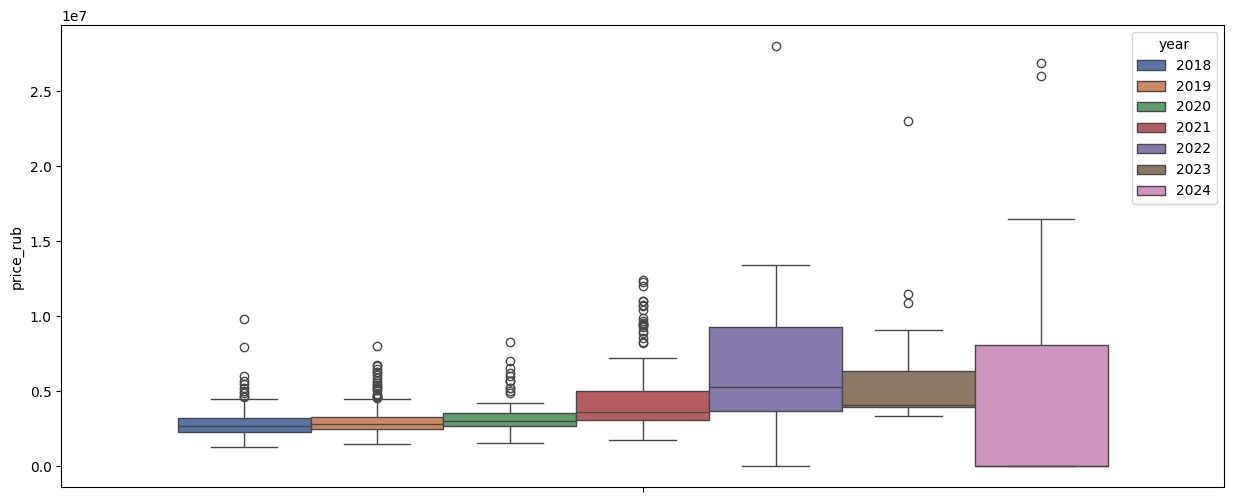

In [16]:
plt.figure(figsize=(15,6))
sns.boxplot(df, y='price_rub', hue='year', palette='deep')

In [17]:
df.groupby('year')['price_rub'].describe().tail(10).style.format("{:,.1f}")

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2018,121.0,"2,984,373.4","1,200,438.1","1,299,999.0","2,300,000.0","2,700,000.0","3,190,000.0","9,800,000.0"
2019,116.0,"3,195,390.2","1,293,720.0","1,450,000.0","2,499,750.0","2,795,000.0","3,300,000.0","7,999,999.0"
2020,100.0,"3,310,641.5","1,146,259.1","1,540,000.0","2,685,500.0","3,025,000.0","3,513,888.8","8,300,000.0"
2021,145.0,"4,640,917.2","2,458,016.4","1,749,000.0","3,100,000.0","3,600,000.0","5,000,000.0","12,400,000.0"
2022,56.0,"6,639,250.4","4,376,109.4",0.0,"3,671,250.0","5,275,000.0","9,262,500.0","28,000,000.0"
2023,24.0,"5,908,512.5","4,287,717.7","3,349,000.0","3,910,000.0","4,084,650.0","6,319,250.0","23,000,000.0"
2024,141.0,"3,959,028.4","5,541,434.0",0.0,0.0,0.0,"8,090,000.0","26,900,000.0"


In [18]:
df.groupby('year')['km_age'].describe().tail(10).style.format("{:,.1f}")

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2018,121.0,"140,120.0","74,839.7","28,000.0","90,300.0","125,716.0","175,000.0","523,412.0"
2019,116.0,"140,813.8","96,640.3","19,000.0","87,275.0","117,626.0","154,000.2","548,766.0"
2020,100.0,"109,523.0","76,850.8","13,000.0","63,925.2","94,250.0","128,075.0","488,098.0"
2021,145.0,"76,481.1","49,756.0",194.0,"42,000.0","68,875.0","95,500.0","320,000.0"
2022,56.0,"42,079.4","36,672.3",0.0,"15,875.0","30,079.5","60,000.0","157,000.0"
2023,24.0,"20,724.9","16,594.6",0.0,"3,630.0","20,977.5","35,250.0","52,000.0"
2024,141.0,277.8,"1,837.9",0.0,0.0,0.0,0.0,"20,000.0"


In [19]:

df = df[df['box_type']=='автомат']
df.box_type.value_counts(0)

box_type
автомат    703
Name: count, dtype: int64

In [20]:
df.columns

Index(['link', 'car_title', 'price_rub', 'year', 'features', 'box_type',
       'car_type', 'drive_type', 'color', 'km_age', 'city', 'snapshot_dtm',
       'years_old', 'km_per_year', 'litres', 'hp', 'fuel', 'car_name',
       'car_model'],
      dtype='object')

In [27]:
np.percentile(df.price_rub, 97.5)

np.float64(9627399.824999996)

In [24]:
price_rub_97 = np.percentile(df.price_rub, 97.5)
price_rub_2 = np.percentile(df.price_rub, 2.5)
km_age_97 = np.percentile(df.km_age, 97.5)
km_age_2 = np.percentile(df.km_age, 2.5)

In [25]:
df = df.query("price_rub.between(@price_rub_2,@price_rub_97)&km_age.between(@km_age_2,@km_age_97)")

<Axes: ylabel='price_rub'>

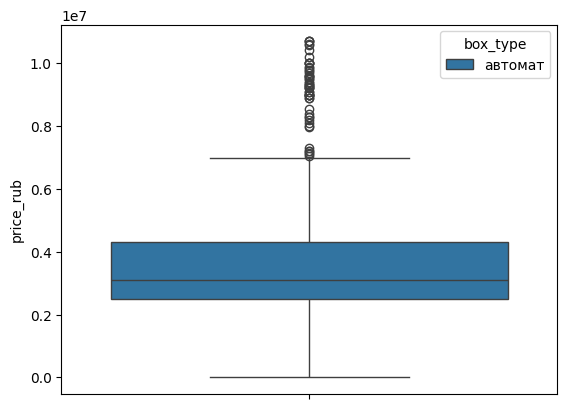

In [28]:
sns.boxplot(df.query('price_rub<@price_rub_97'), y='price_rub', hue='box_type')

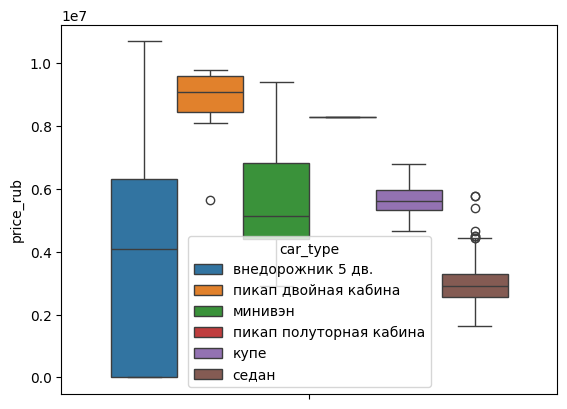

<Axes: xlabel='Count', ylabel='car_type'>

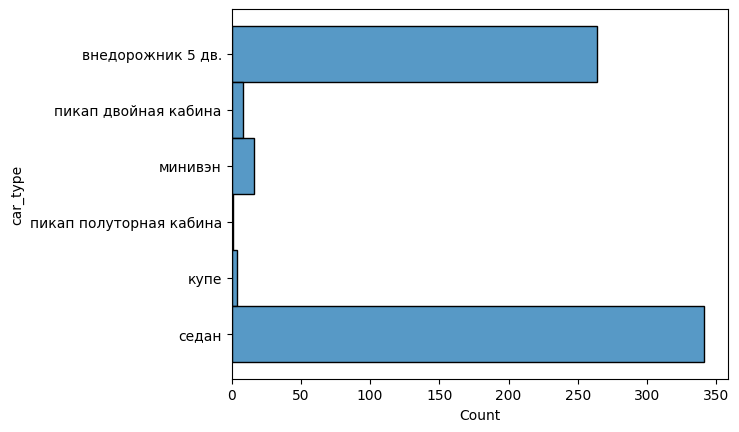

In [29]:
sns.boxplot(df, y='price_rub', hue='car_type')
plt.show()
sns.histplot(df, y='car_type')

In [30]:
df.car_type.unique()

array(['внедорожник 5 дв.', 'пикап двойная кабина', 'минивэн',
       'пикап полуторная кабина', 'купе', 'седан'], dtype=object)

In [31]:
df = df[df['car_type'].isin(['внедорожник 5 дв.','седан','хэтчбек 5 дв.'])]
df = df[df['color'].isin(['серый','чёрный','красный','синий','серебристый','белый'])]

In [32]:
df.color.unique()

array(['чёрный', 'белый', 'серый', 'синий', 'серебристый', 'красный'],
      dtype=object)

<Axes: xlabel='Count', ylabel='color'>

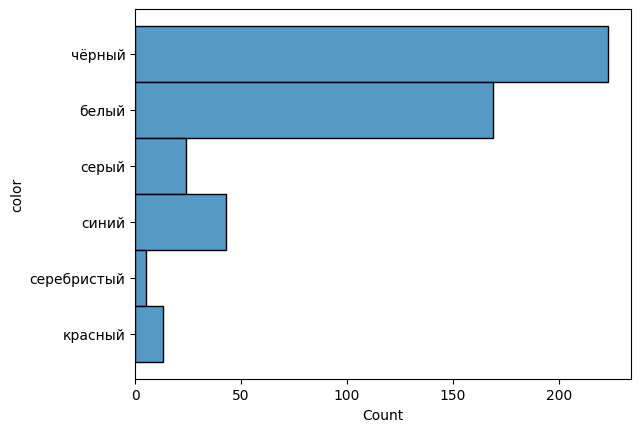

In [33]:
sns.histplot(df, y='color')

<Axes: ylabel='price_rub'>

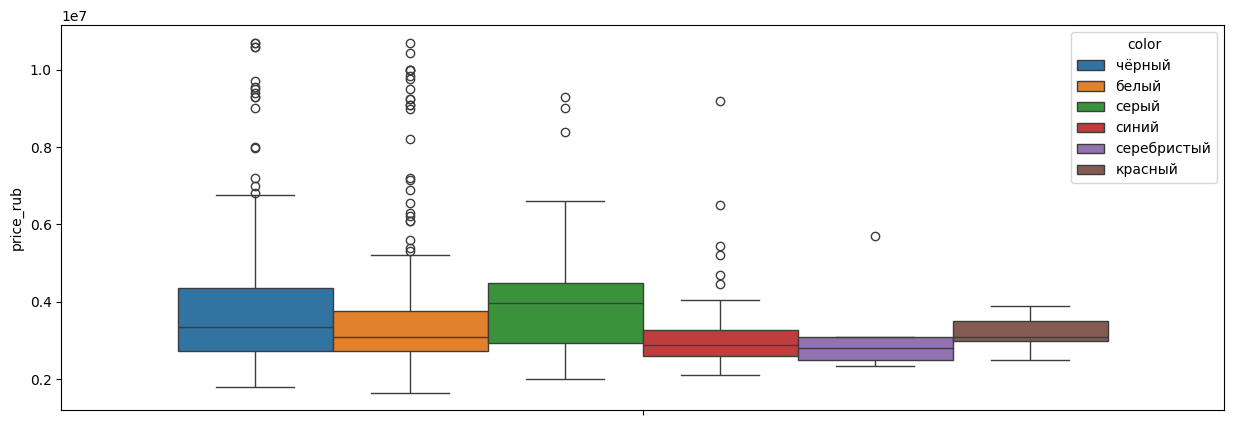

In [34]:
plt.figure(figsize=(15,5))
sns.boxplot(df, y='price_rub', hue='color')

<Axes: ylabel='price_rub'>

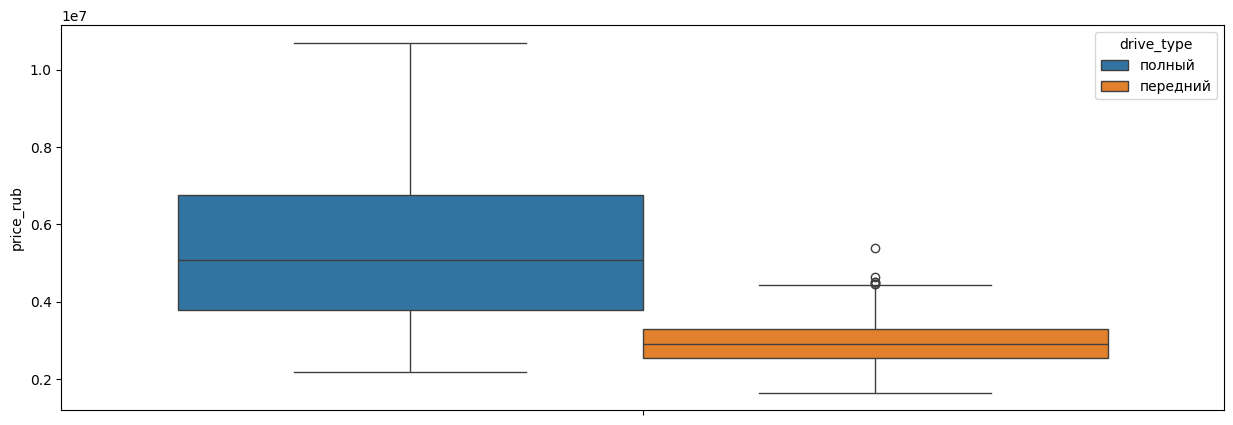

In [35]:
plt.figure(figsize=(15,5))
sns.boxplot(df, y='price_rub', hue='drive_type')

In [36]:
df.groupby('drive_type').count()

,link,car_title,price_rub,year,features,box_type,car_type,color,km_age,city,snapshot_dtm,years_old,km_per_year,litres,hp,fuel,car_name,car_model
drive_type,,,,,,,,,,,,,,,,,,
передний,329,316,329,329,329,329,329,329,329,329,329,329,329,329,329,329,316,316
полный,148,144,148,148,148,148,148,148,148,148,148,148,148,148,148,148,144,144


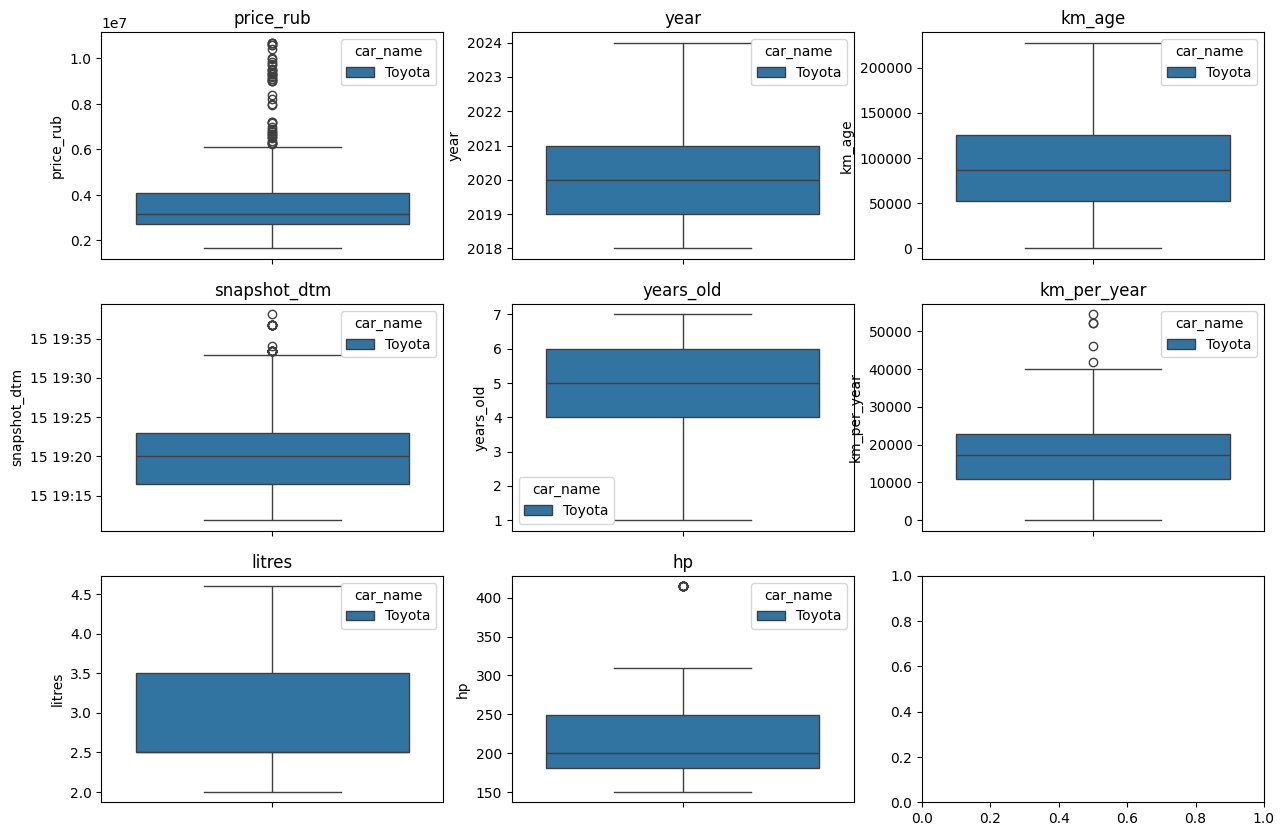

In [37]:
fig, ax = plt.subplots(3,3,figsize=(15,10))
ax = ax.flatten()
for i, v in enumerate(df.dtypes[df.dtypes!="object"].index):
    ax[i].set_title(v)
    sns.boxplot(df, y=v, hue='car_name', ax = ax[i])

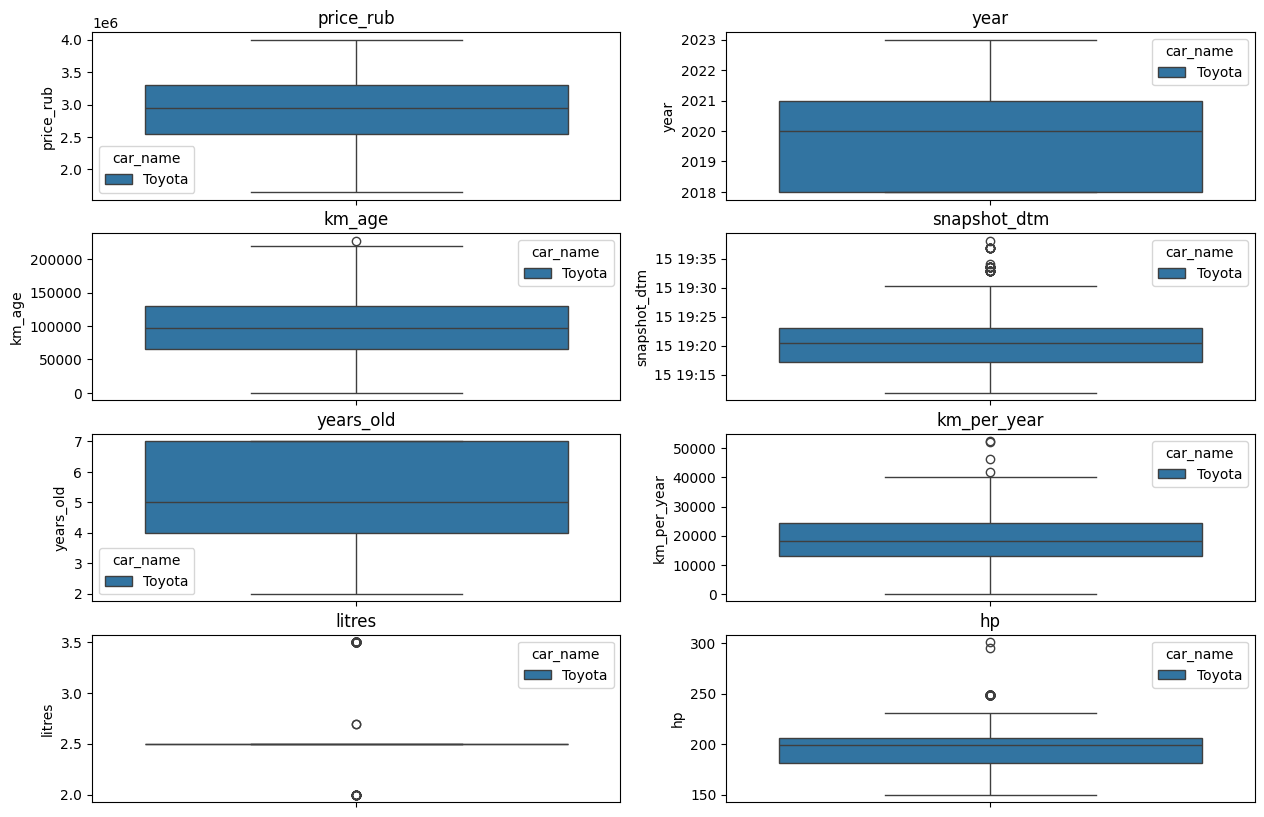

In [38]:
fig, ax = plt.subplots(4,2,figsize=(15,10))
ax = ax.flatten()
for i, v in enumerate(df.dtypes[df.dtypes!="object"].index):
    ax[i].set_title(v)
    sns.boxplot(df.query("year>2005&price_rub.between(100000,4000000)&km_age<300000"),
                y=v,
                hue='car_name',
                ax = ax[i])

In [39]:
len(df.query("year>2005&price_rub.between(100000,4000000)&km_age<200000"))/len(df)

0.7148846960167715

<Axes: title={'center': 'Корреляция на выборочных данных'}>

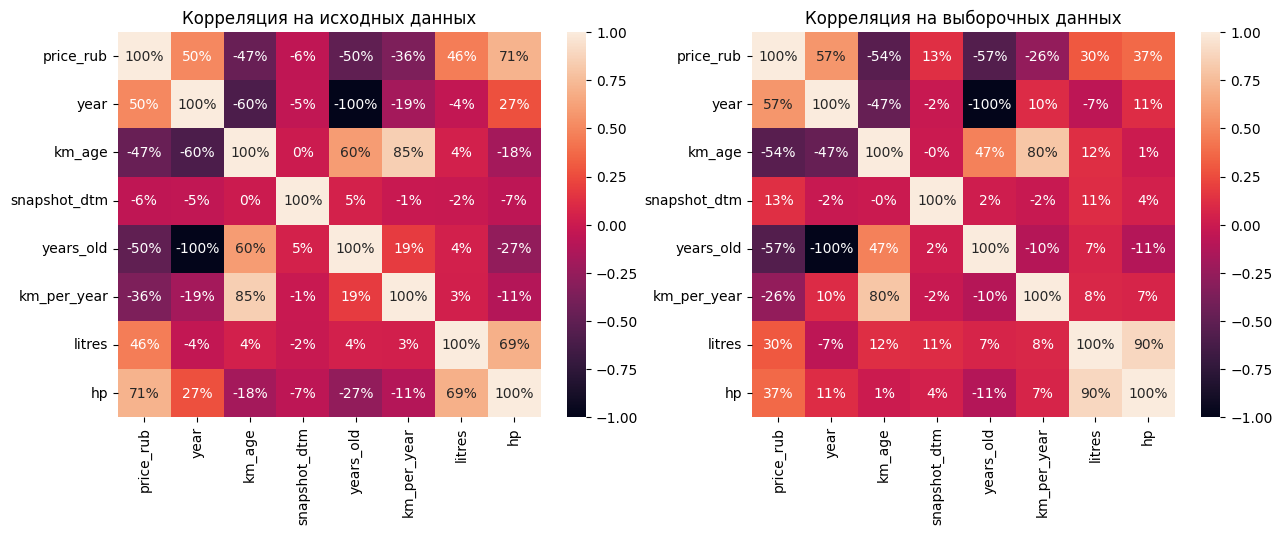

In [40]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].set_title("Корреляция на исходных данных")
sns.heatmap(df[df.dtypes[df.dtypes!="object"].index].corr(), annot=True, fmt=".0%", ax=ax[0])
sample = df.query("year>2005&price_rub.between(100000,4000000)&km_age<200000")
ax[1].set_title("Корреляция на выборочных данных")
sns.heatmap(sample[sample.dtypes[sample.dtypes!="object"].index].corr(), annot=True, fmt=".0%", ax=ax[1])

In [41]:
sample = df.copy()
sample = sample.drop(columns=['features'])

In [42]:
sample = sample[~sample['car_model'].isin(['Picanto','Soul'])]

In [43]:

# Стандартизация данных
def standardize(column):
    return (column - column.mean()) / column.std()

sample['norm_price'] = -standardize(sample['price_rub'])  # Чем ниже цена, тем лучше
sample['norm_year'] = standardize(sample['year'])  # Чем новее, тем лучше
sample['norm_mileage'] = -standardize(sample['km_age'])  # Чем меньше пробег, тем лучше
sample['norm_engine_power'] = standardize(sample['hp'])  # Чем мощнее, тем лучше
sample['norm_engine_volume'] = -standardize(sample['litres'])  # Чем больше объем, тем лучше

# One-hot encoding для категориальных переменных
sample = pd.get_dummies(sample, columns=['car_type', 'drive_type'])

In [54]:
sample = sample.query('price_rub<=2000000')

In [55]:
# Определение весов для числовых переменных
weights = {
    'norm_price': 0.25,
    'norm_year': 0.19,
    'norm_mileage': 0.2,
    'norm_engine_power': 0.1,
    'norm_engine_volume': 0.1
}

# Определение весов для категориальных переменных
categorical_weights = {
    'car_type_внедорожник 5 дв.': 0.02,
    'car_type_седан': 0.01,
    # 'car_type_хэтчбек 5 дв.': 0.04,
    # 'drive_type_задний': 0.01,
    'drive_type_полный': 0.02,
    'drive_type_передний': 0.02,
}

# Объединение весов
weights.update(categorical_weights)
sum(weights.values())

0.91

In [56]:
from IPython.display import display, HTML
# Расчет взвешенной суммы
sample['score'] = sum(sample[param] * weight for param, weight in weights.items())

# Сортировка по рейтингу
sample_sorted = sample.sort_values(by='score', ascending=False)

sample_sorted['link'] = sample_sorted['link'].apply(lambda x: f'<a href="{x}">{x}</a>')
display(HTML(sample_sorted.head(25).to_html(escape=False)))

C:\Users\iae95\AppData\Local\Temp\ipykernel_16976\2382817023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['score'] = sum(sample[param] * weight for param, weight in weights.items())


,link,car_title,price_rub,year,box_type,color,km_age,city,snapshot_dtm,years_old,km_per_year,litres,hp,fuel,car_name,car_model,norm_price,norm_year,norm_mileage,norm_engine_power,norm_engine_volume,car_type_внедорожник 5 дв.,car_type_седан,drive_type_передний,drive_type_полный,score
1325,https://auto.ru/cars/used/sale/toyota/camry/1128240958-0044a211/,Toyota Camry VIII (XV70),1650000,2019,автомат,белый,129000,Москва,2025-06-15 19:11:52.445641,6,21500.000000,2.0,150,Бензин,Toyota,Camry,1.171610,-0.670083,-0.765774,-1.276103,1.439710,False,True,True,False,0.058793
1296,https://auto.ru/cars/used/sale/toyota/camry/1128274631-7f004031/,Toyota Camry VIII (XV70),1999000,2020,автомат,чёрный,193000,Москва,2025-06-15 19:15:09.231696,5,38600.000000,2.0,150,Бензин,Toyota,Camry,0.982329,-0.025668,-2.011237,-1.276103,1.439710,False,True,True,False,-0.115182
1310,https://auto.ru/cars/used/sale/toyota/camry/1128327735-b5cca0c7/,Toyota Camry VII (XV50) Рестайлинг 2,1800000,2018,автомат,чёрный,133000,Москва,2025-06-15 19:11:52.448712,7,19000.000000,2.5,181,Бензин,Toyota,Camry,1.090257,-1.314497,-0.843616,-0.663628,0.556554,False,True,True,False,-0.126621
1288,https://auto.ru/cars/used/sale/toyota/camry/1121819787-eff5acd3/,Toyota Camry US Market VIII (XV70),2000000,2018,автомат,серый,140000,Москва,2025-06-15 19:14:29.204539,7,20000.000000,2.5,203,Бензин,Toyota,Camry,0.981786,-1.314497,-0.979838,-0.228969,0.556554,False,True,True,False,-0.137517
1297,https://auto.ru/cars/used/sale/toyota/camry/1128180599-2e4053e7/,Toyota Camry US Market VIII (XV70),1950000,2018,автомат,чёрный,184000,Москва,2025-06-15 19:11:52.458320,7,26285.714286,2.5,203,Бензин,Toyota,Camry,1.008904,-1.314497,-1.836094,-0.228969,0.556554,False,True,True,False,-0.301989
1314,https://auto.ru/cars/used/sale/toyota/camry/1125457042-3d2cb530/,Toyota Camry VIII (XV70),1780000,2018,автомат,белый,207000,Москва,2025-06-15 19:14:29.220151,7,29571.428571,2.0,150,Бензин,Toyota,Camry,1.101104,-1.314497,-2.283682,-1.276103,1.439710,False,True,True,False,-0.384854
1307,https://auto.ru/cars/used/sale/toyota/camry/1126418581-e722ff0d/,Toyota Camry VIII (XV70),1833500,2018,автомат,белый,211228,Москва,2025-06-15 19:16:26.359335,7,30175.428571,2.5,181,Бензин,Toyota,Camry,1.072088,-1.314497,-2.365960,-0.663628,0.556554,False,True,True,False,-0.435632
